# $$ Clustering  Assignment $$

## Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

## Goals and Objectives
The requisite is:
- To categorize the countries using some socio-economic and health factors that determine the overall development of the country. 
- To suggest the countries which the CEO needs to focus on the most.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Read of dataset
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Reading the data dictionary file
df_structure = pd.read_csv('data-dictionary+.csv',index_col=0)

# need this for just one cell
with pd.option_context('display.max_colwidth', None):
    display(df_structure)

,Description
Column Name,
country,Name of the country
child_mort,Death of children under 5 years of age per 1000 live births
exports,Exports of goods and services per capita. Given as %age of the GDP per capita
health,Total health spending per capita. Given as %age of GDP per capita
imports,Imports of goods and services per capita. Given as %age of the GDP per capita
Income,Net income per person
Inflation,The measurement of the annual growth rate of the Total GDP
life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.


####  Dataframe Inspection

In [4]:
# The .info() code gives almost the entire information that needs to be inspected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# The .shape code gives the no. of rows and columns
df.shape

(167, 10)

In [6]:
#To get an idea of the numeric values, use .describe()
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
#To get an idea of the features and their data types if need to be changed any, use .dtypes()
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
# Duplicates check
df.loc[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [9]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

- __In the dataframe provided, imports,exports and health features have the percentage of money spent or gained from these sectors from the total gdpp which is not clear. So, to avoid this, values in imports, exports and health are converted to absolute values__

In [10]:
for i in ['imports','exports','health']:
    df[i] = (df[i] * df['gdpp'])/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


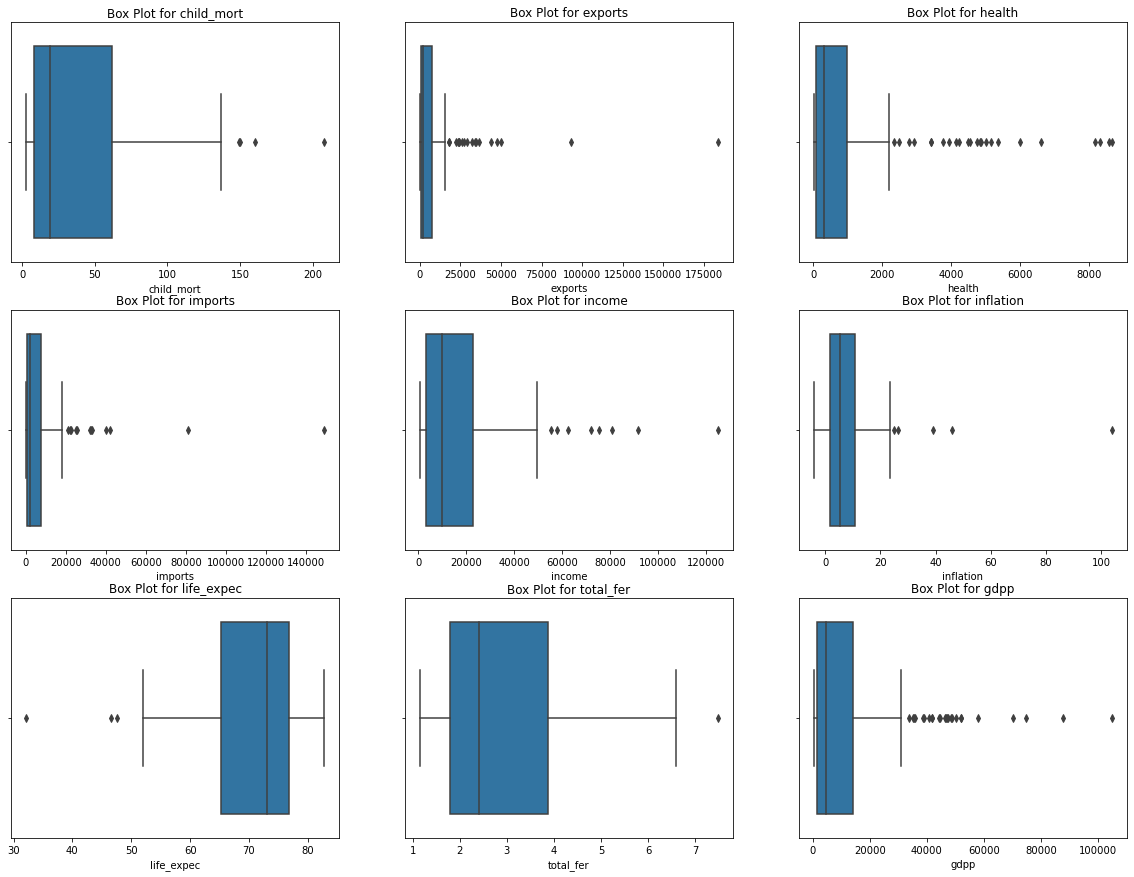

In [11]:
# lets check for outliers in the data set
cols = df.drop("country",1)

plt.figure(figsize=(20,15))
for idx,col in enumerate(cols):
    plt.subplot(3, 3, idx+1)
    sns.boxplot(x=col, data =df)
    plt.title("Box Plot for "+ col)
    
plt.show()

## Outliers Treatment

In [12]:
def outlier_treatment(df, col):
    
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    df.loc[(df[col] > higher_cap), col] = higher_cap
    df.loc[(df[col] < lower_cap), col] = lower_cap
    
    return df


def upper_range_out(df, col):
    
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    higher_cap = Q3+1.5*IQR

    df.loc[(df[col] > higher_cap), col] = higher_cap
    
    return df

def lower_range_out(df, col):
    
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    df.loc[(df[col] < lower_cap), col] = lower_cap
    
    return df

In [13]:
df = lower_range_out(df, 'child_mort')
df = lower_range_out(df, 'inflation')
df = lower_range_out(df, 'total_fer')

df = upper_range_out(df, 'exports')
df = upper_range_out(df, 'health')
df = upper_range_out(df, 'imports')
df = upper_range_out(df, 'income')
df = upper_range_out(df, 'life_expec')
df = upper_range_out(df, 'gdpp')

In [14]:
df.shape

(167, 10)

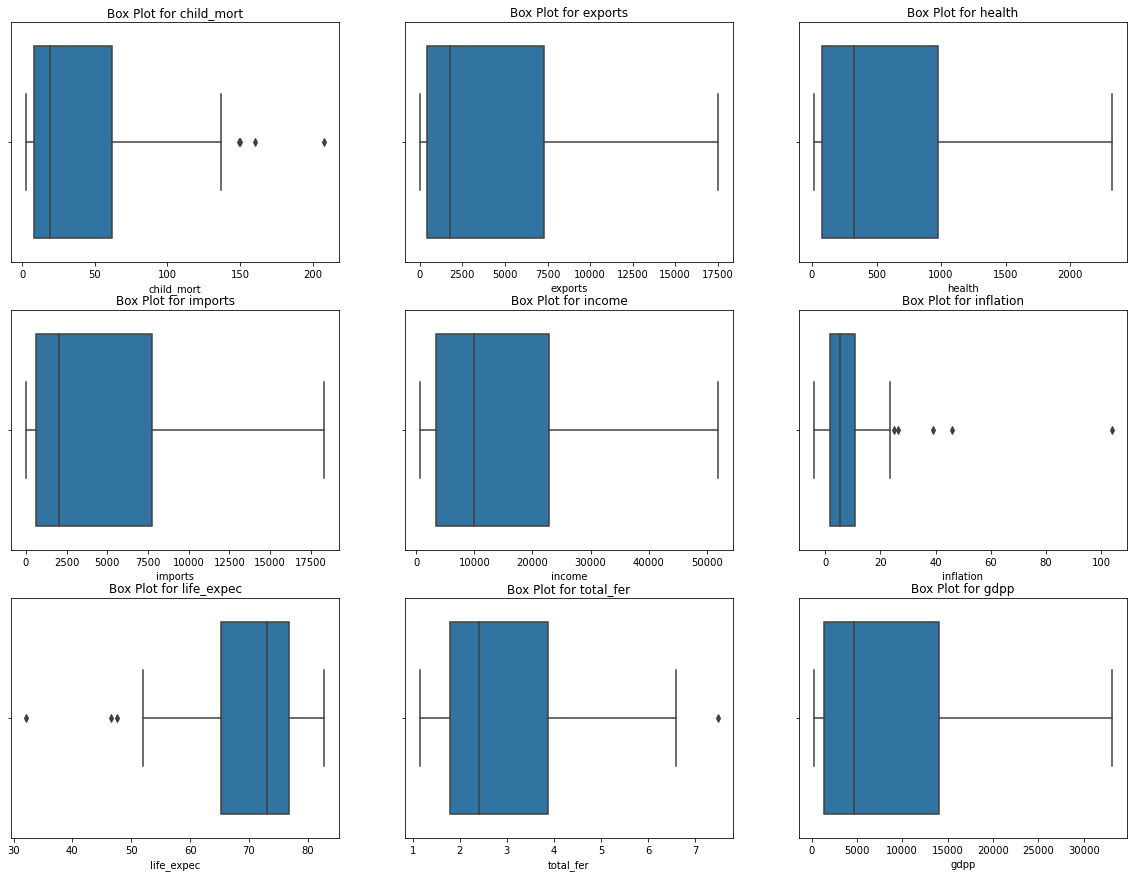

In [15]:
# lets check for outliers in the data set
cols = df.drop("country",1)

plt.figure(figsize=(20,15))
for idx,col in enumerate(cols):
    plt.subplot(3, 3, idx+1)
    sns.boxplot(x=col, data =df)
    plt.title("Box Plot for "+ col)
    
plt.show()

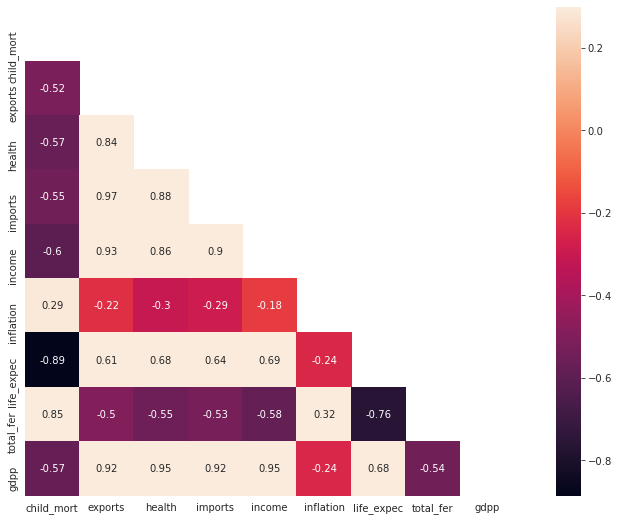

In [16]:
# lets check the correlation between different features

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,9))
    ax = sns.heatmap(df.corr(), mask=mask, vmax=.3, square=True,annot=True)

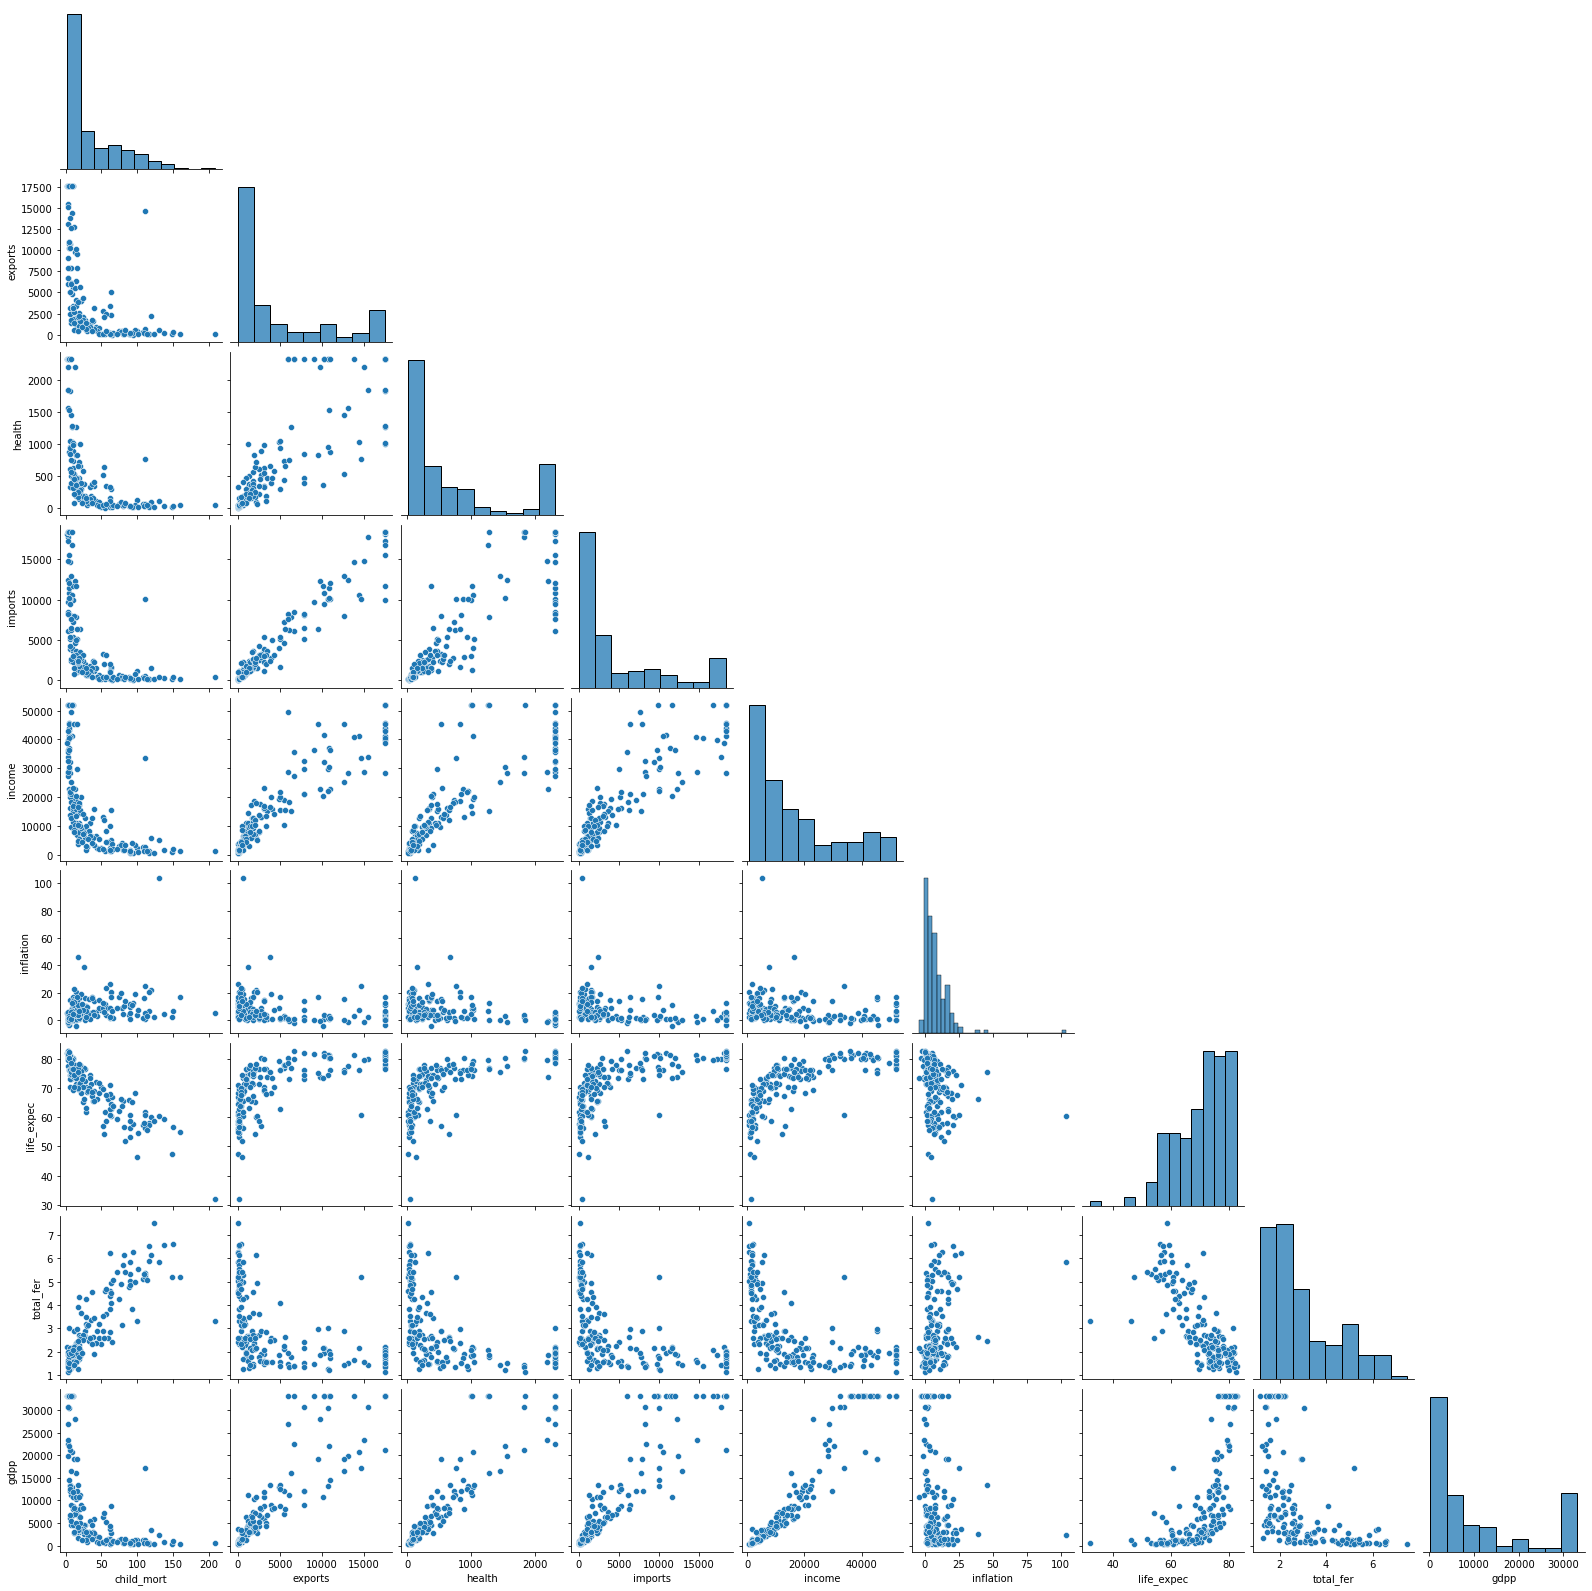

In [17]:
sns.pairplot(df,corner=True);

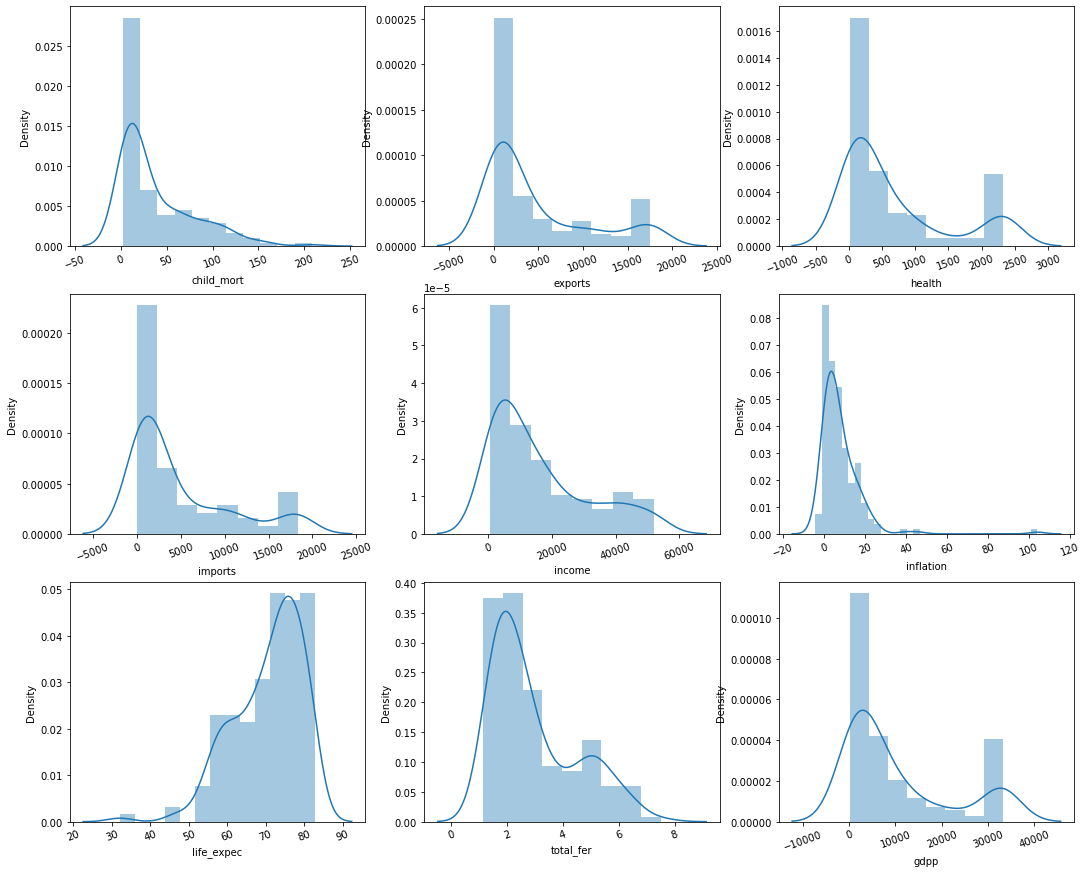

In [18]:
plt.figure(figsize=(18,15))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation=20)

### __Hopkins Statistics__ 
Hopkins Statistics help us to decide whether the cluters can be formed easily or not. If the values are:<br>

 - 0.01 - 0.3 : Low chase of clustering <br>
 - around 0.5 : Random <br>
 - 0.7 - 0.99 : High chance of clustering <br>

In [19]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
hopkins(df.drop('country',1))

0.8294730502249135

Since the value is between 0.7 - 0.99, there is a high chance of clustering to be formed

In [21]:
# to get back if any problem occurse use always a dummy variable to store data set
df_final = df.copy()

In [22]:
# Making country dataset
country = pd.DataFrame(df_final["country"])

In [23]:
# Dropping country to proceed with clustering
df_final = df_final.drop(['country'],1)
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [24]:
# instantiate 
scaler = StandardScaler()

# fit_transform
scaled_data = pd.DataFrame(scaler.fit_transform(df_final))

scaled_data.columns = df_final.columns[df_final.dtypes != 'object']

scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.800564,-0.795563,-0.794660,-0.943936,0.157336,-1.619092,1.902882,-0.846341
1,-0.538949,-0.613150,-0.513920,-0.488076,-0.395181,-0.312347,0.647866,-0.859973,-0.540827
2,-0.272833,-0.515576,-0.616010,-0.591590,-0.199291,0.789274,0.670423,-0.038404,-0.508868
3,2.007808,-0.431911,-0.722418,-0.571509,-0.660984,1.387054,-1.179234,2.128151,-0.589198
4,-0.695634,0.144450,0.069070,0.428104,0.209637,-0.601749,0.704258,-0.541946,0.159686


## K- Means

## Silhouette Analysis
- Value of the silhouette score range is in between -1 to 1.
- A score closer to 1 : The data point is very similar to other data points in the cluster
- A score closer to -1 : The data point is not similar to the data points in its cluster.

In [25]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(scaled_data)
    sse_.append([k, silhouette_score(scaled_data, kmeans.labels_)])

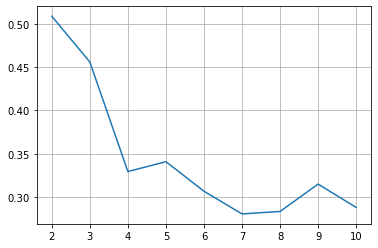

[[2, 0.5088446302766765],
 [3, 0.4559826878073939],
 [4, 0.32943188799557205],
 [5, 0.3408449518762589],
 [6, 0.30671269573595383],
 [7, 0.2805119293636758],
 [8, 0.2833566331420747],
 [9, 0.31495007229194805],
 [10, 0.28800406756201197]]

In [26]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.grid()
plt.show()
sse_

## Sum of Squared Distances

In [27]:
ssd = []
for num_clusters in list(range(2,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(scaled_data)
    ssd.append(model_clus.inertia_)

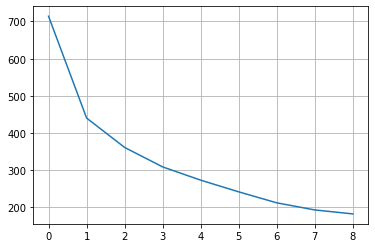

In [28]:
plt.plot(ssd)
plt.grid()
plt.show()


 __From the Elbow curve and silhoutte score, we will choose k values . Optimal number for K seems to be 3.__

In [29]:
# Kmeans with K=3
model = KMeans(n_clusters = 3, max_iter=50, random_state=50)
model.fit(scaled_data)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [30]:
# Centroids
model.cluster_centers_

array([[-0.3668193 , -0.40374568, -0.37721176, -0.38091474, -0.30808631,
        -0.00382989,  0.19881901, -0.40779936, -0.39568084],
       [-0.8112524 ,  1.53756094,  1.55551269,  1.53128081,  1.52142306,
        -0.43141269,  1.01042574, -0.76075114,  1.60817725],
       [ 1.39941582, -0.67414663, -0.73826372, -0.70952043, -0.83163009,
         0.39995869, -1.27848434,  1.42716765, -0.75300264]])

In [31]:
#checking kmeans.labels_ array
model.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [32]:
#copying the previous data and creating new one for further steps
df1=df_final.copy()
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [33]:
#adding cluster id to the data count_0
df1['cluster_id'] = model.labels_
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


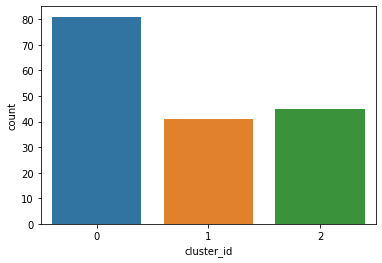

In [34]:
#Plotting Cluster ID
sns.countplot(df1.cluster_id)
plt.show()

In [35]:
#count of cluster_id
df1['cluster_id'].value_counts()

0    81
2    45
1    41
Name: cluster_id, dtype: int64

,child_mort,gdpp,income
cluster_id,,,
0,23.520988,5770.395062,11250.493827
1,5.651220,28969.512195,38988.780488
2,94.537778,1633.600000,3312.733333


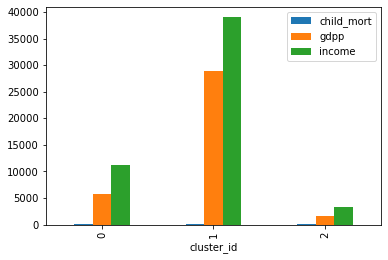

In [36]:
df1[['child_mort','gdpp','income','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')
df1[['child_mort','gdpp','income','cluster_id']].groupby('cluster_id').mean()

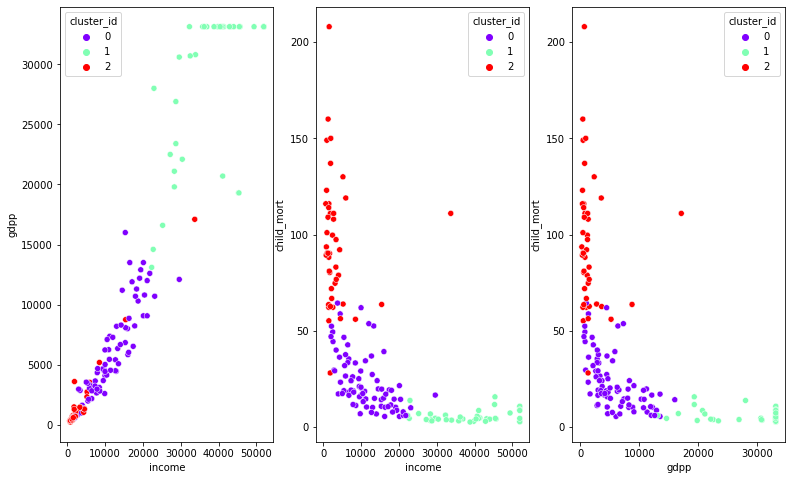

In [60]:
plt.figure(figsize=(13,8))
plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df1, palette='rainbow')
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df1, palette='rainbow')
plt.subplot(1,3,3)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df1, palette='rainbow')
plt.show()

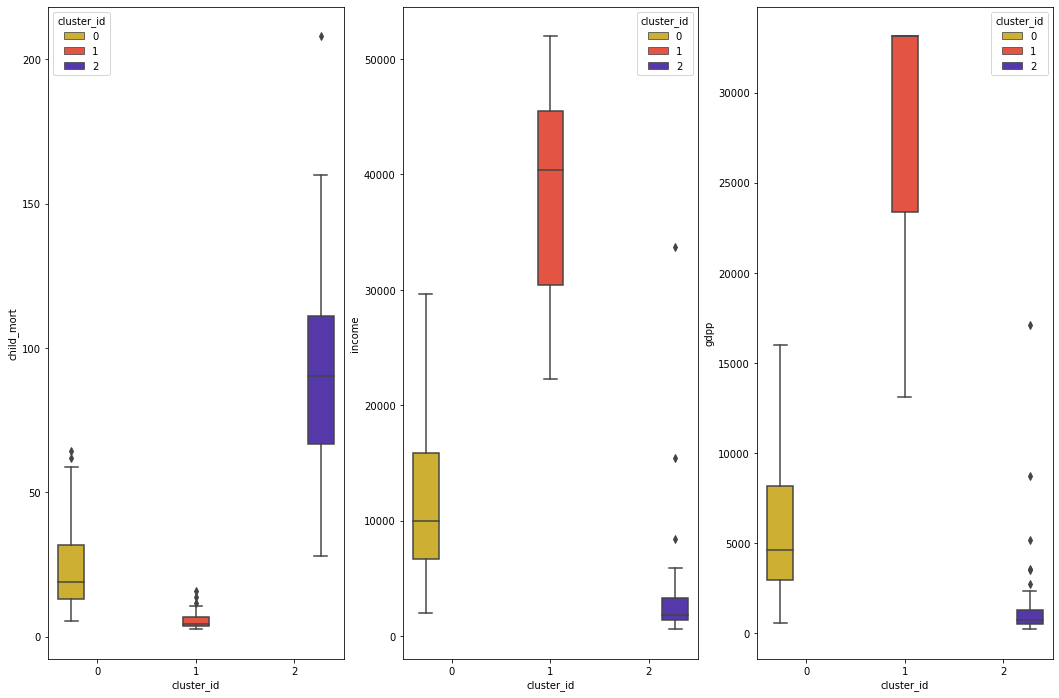

In [55]:
plt.figure(figsize=(18,12))

plt.subplot(1,3,1)
sns.boxplot(x = 'cluster_id', y = 'child_mort', data = df1, palette='CMRmap_r',hue="cluster_id")

plt.subplot(1,3,2)
sns.boxplot(x = 'cluster_id', y = 'income', data = df1, palette='CMRmap_r',hue="cluster_id")

plt.subplot(1,3,3)
sns.boxplot(x = 'cluster_id', y = 'gdpp',data = df1, palette='CMRmap_r',hue="cluster_id")
plt.show()

- **Inference** : From the above boxplot, cluster_id =2 has high child mortality,low income and low gdpp.

In [39]:
df1['country']=country['country']
df1[df1['cluster_id']==2]['country'].head()

0      Afghanistan
3           Angola
17           Benin
25    Burkina Faso
26         Burundi
Name: country, dtype: object

In [40]:
#showing top 10countries that need aid
AID1=df1[df1['cluster_id']==2][['country','child_mort','gdpp','income']].sort_values(by=['child_mort','gdpp','income'],ascending=[False,True,True])[['country','child_mort','gdpp','income']]
AID1.head(10)

,country,child_mort,gdpp,income
66,Haiti,208.0,662.0,1500.0
132,Sierra Leone,160.0,399.0,1220.0
32,Chad,150.0,897.0,1930.0
31,Central African Republic,149.0,446.0,888.0
97,Mali,137.0,708.0,1870.0
113,Nigeria,130.0,2330.0,5150.0
112,Niger,123.0,348.0,814.0
3,Angola,119.0,3530.0,5900.0
37,"Congo, Dem. Rep.",116.0,334.0,609.0
25,Burkina Faso,116.0,575.0,1430.0


# HIERARCHICAL CLUSTERING

In [41]:
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.800564,-0.795563,-0.794660,-0.943936,0.157336,-1.619092,1.902882,-0.846341
1,-0.538949,-0.613150,-0.513920,-0.488076,-0.395181,-0.312347,0.647866,-0.859973,-0.540827
2,-0.272833,-0.515576,-0.616010,-0.591590,-0.199291,0.789274,0.670423,-0.038404,-0.508868
3,2.007808,-0.431911,-0.722418,-0.571509,-0.660984,1.387054,-1.179234,2.128151,-0.589198
4,-0.695634,0.144450,0.069070,0.428104,0.209637,-0.601749,0.704258,-0.541946,0.159686


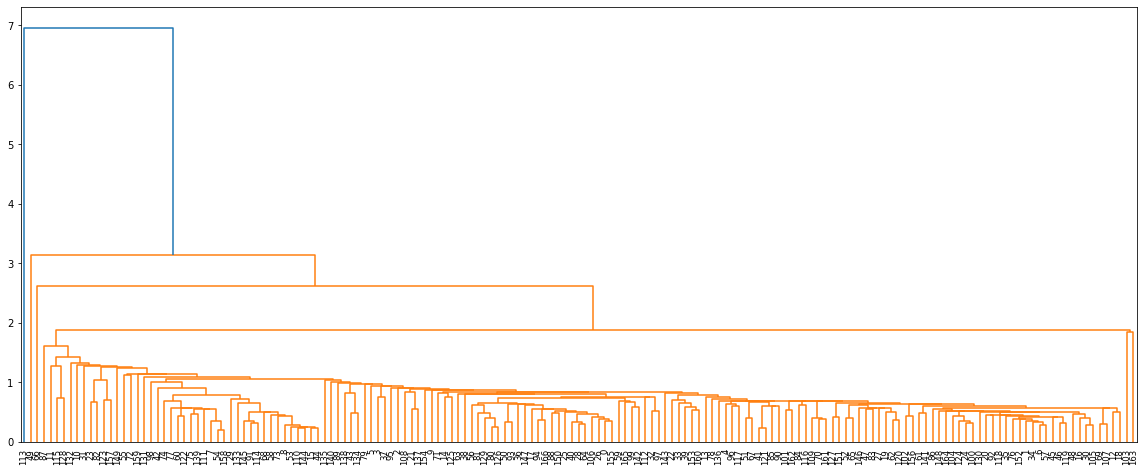

In [42]:
#single linkage
plt.figure(figsize=(20,8))
mergings = linkage(scaled_data, method="single", metric='euclidean')
dendrogram(mergings)
plt.xticks(fontsize=8.5)
plt.show()

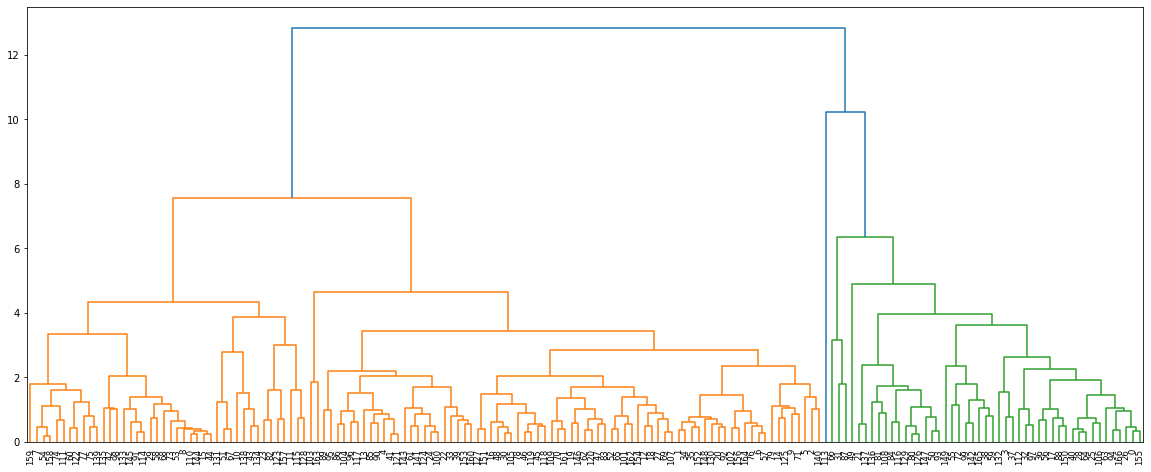

In [43]:
#complete linkage
plt.figure(figsize=(20,8))
mergings_c = linkage(scaled_data, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.xticks(fontsize=8.5)
plt.show()

- **Inference** : Complete Linkage model will be a good approach.

In [44]:
# 4 clusters as we can see from dendogram
cluster_labels = cut_tree(mergings_c, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [45]:
#cluster labels to the dataset
df2=df_final.copy()
df2['cluster_id']=cluster_labels

In [46]:
#count of cluster_id
df2.cluster_id.value_counts()

1    119
0     48
Name: cluster_id, dtype: int64

,child_mort,gdpp,income
cluster_id,,,
0,91.610417,1909.208333,3897.354167
1,16.754622,13756.487395,20771.680672


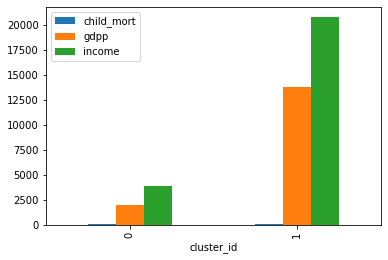

In [47]:
df2[['child_mort','gdpp','income','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')
df2[['child_mort','gdpp','income','cluster_id']].groupby('cluster_id').mean()

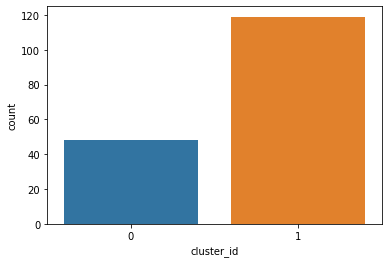

In [48]:
#countplot of cluster label
sns.countplot(df2.cluster_id)
plt.show()

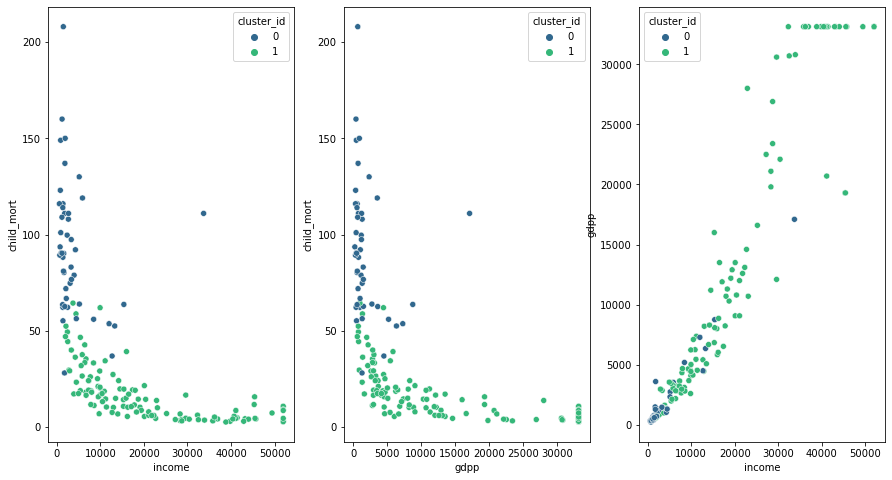

In [49]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df2, palette='viridis')
plt.subplot(1,3,2)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df2, palette='viridis')
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df2, palette='viridis')
plt.show()

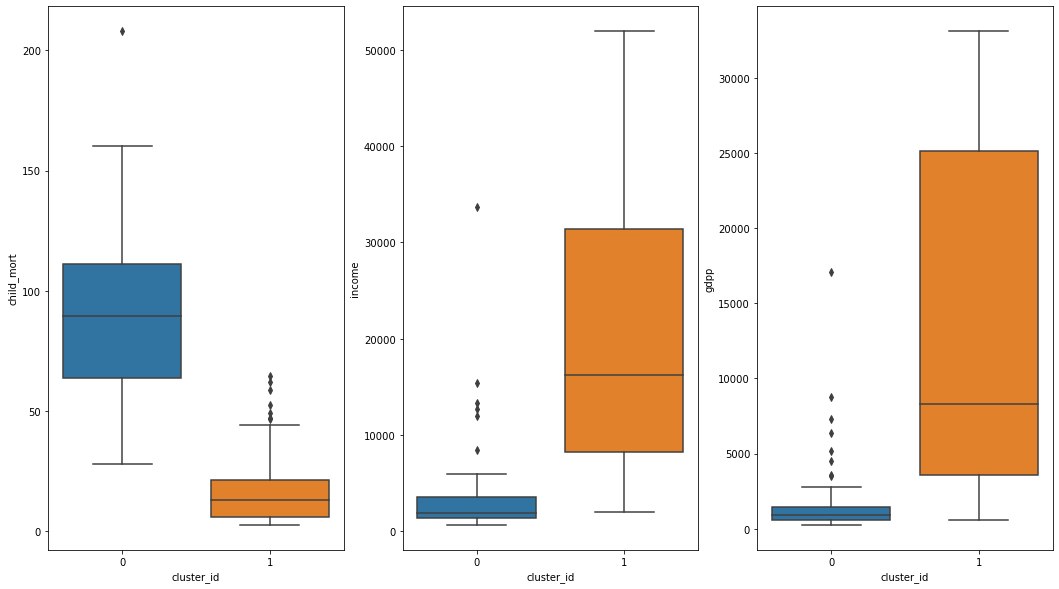

In [50]:
plt.figure(figsize=(18,10))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id',y='child_mort',data=df2)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id',y='income',data=df2)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id',y='gdpp',data=df2)
plt.show()

In [51]:
df2['country']=country['country']

In [52]:
#showing top 10countries that need aid
AID2=df2[df2['cluster_id']==0][['country','child_mort','gdpp','income']].sort_values(by=['child_mort','gdpp','income'],ascending=[False,True,True])[['country','child_mort','gdpp','income']]
AID2.head(10)

,country,child_mort,gdpp,income
66,Haiti,208.0,662.0,1500.0
132,Sierra Leone,160.0,399.0,1220.0
32,Chad,150.0,897.0,1930.0
31,Central African Republic,149.0,446.0,888.0
97,Mali,137.0,708.0,1870.0
113,Nigeria,130.0,2330.0,5150.0
112,Niger,123.0,348.0,814.0
3,Angola,119.0,3530.0,5900.0
37,"Congo, Dem. Rep.",116.0,334.0,609.0
25,Burkina Faso,116.0,575.0,1430.0


## TOP 5 COUNTRIES THAT ARE IN DIREST NEED OF AID

In [61]:
AID2['country'].head(5)

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
Name: country, dtype: object